## Classification Example Using Pytorch
This example illustrates the use of pytorch to demonstrate classification on the well known iris dataset. We will use the pytorch library from facebook for this purpose. 

In [1]:
import pandas as pd
import os
import numpy as np
os.chdir("/home/admin123/DLIntroWorkshop")
fp = "iris.csv"

In [2]:
from sklearn.model_selection import train_test_split
df = pd.read_csv(fp)

In [3]:
s = df["species"].unique()
ids = [i for i in range(len(s))]
s2id = {s:i for s,i in zip(s, ids)}
df["species"] = df["species"].apply(lambda x: s2id[x])
preds = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


### Note:
75 % of the data is used for training and 25 % used for test.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[preds].values,\
                                                    df["species"].values, test_size=0.25, random_state=1)

In [5]:
y_train = y_train.astype(np.float64)

y_test = y_test.astype(np.float64)


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

### Implementation Notes
1. Data has four variables, these will form the input nodes to the network
2. We will use a single layer with the relu activation function.
3. The ouput from the nueron layer goes to the output layer. This is a multi-class (three classes) rather than a binary classification problem. Accordingly, the output from the neuron layer goes to an output layer. The output layer takes four inputs and produces three outputs (corresponding to the thress classes).

In [7]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(4, 4)
        self.l2 = nn.Linear(4, 3)

    def forward(self, x):
       
        x = F.relu(self.l1(x))
        return self.l2(x)

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


## Notes about Pytorch Implementation
Data in pytorch are abstracted by Tensors. To perform operations on Tensors we need to create a computational graph that describe the computation we want to perform on the data (tensors). Once we have expressed our computation in terms of a computational graph, we execute it. To put a tensor on a computational graph and perform operations on it, we need the notion of a variable. These ideas are illustrated below

In [8]:
x_data = Variable(torch.Tensor(X_train))
y_data = Variable(torch.LongTensor(y_train))

In [9]:
x_data.shape

torch.Size([112, 4])

In [10]:
output = model(x_data)


In [11]:
criterion(output, y_data)

tensor(1.1645, grad_fn=<NllLossBackward>)

## Train the Network
The data is fed through the network in a forward pass. Backpropogation is then implemented in the backward pass through the network. Gradient updates determined during the backward pass are used to update the weights for the network. One complete pass of the data through the network. After running some epochs, we plot the loss versus the epochs to see if we are seeing a change in loss with epoch. This serves as a guideline for the amount of training required

Text(0,0.5,'Loss')

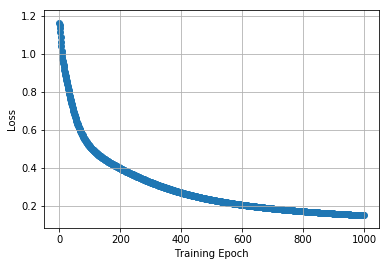

In [12]:
# Training loop
ei = []
losses = []
torch.manual_seed(1254)

for epoch in range(1000):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    lv = loss.data.numpy()
    lv = lv.item(0)
    
    ei.append(epoch)
    losses.append(loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(ei, losses)
plt.grid()
plt.xlabel("Training Epoch")
plt.ylabel("Loss")

In [13]:
xt_data = Variable(torch.Tensor(X_test))
model_pred = model(xt_data)

In [14]:
yt_pred_nn = model_pred.data.max(1)[1]

In [15]:
yt_pred_nn = yt_pred_nn.numpy()

In [16]:
from sklearn.metrics import accuracy_score
y_test = y_test.astype(int)
accuracy_score(y_test, yt_pred_nn)

0.9473684210526315

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
yt_pred_dt = clf.predict(X_test)
accuracy_score(y_test, yt_pred_dt)

0.9736842105263158